### Modellare la volatilità con i modelli ARCH e GARCH

Fonti:
- Lewinson 2020 Python for Finance Cookbook - cap. 5
- Yan 2017 Python for Finance - cap. 15

Parliamo di "eteroschedasticità condizionale" quando la variazioni della volatilità sono collegate fra loro. Abbiamo visto nel laboratorio sulla diagnostica delle serie temporali che la volatilità del rendimento di un titolo o di un portafoglio tende a subire improvvisi aumenti e poi a rimanere per un certo periodo su livelli più alti. Stesso comportamento abbiamo osservato nell'indice VIX, che misura la volatilità implicita nelle opzioni sull'indice S&P500

#### Modello ARCH (AutoRegressive Conditional Heteroskedasticity

$
r_t = \mu + \epsilon_t
$

$
\epsilon_t = \sigma_t z_t
$

$
\sigma^{2}_{t} = \omega + \sum_{i=1}^q a_i \epsilon^{2}_{t-i}\
$

dove
$
\omega > 0
$
$
\alpha_i >= 0
$

#### 1.Simulazione di un processo ARCH(1)

In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sp.random.seed(12345)
n = 1000 
#n1 = 1
#n2 = n + n1


Per la simulazione la varianza non condizionale del modello ARCH è uguale a

$
\frac {\omega} {(1 - \alpha_i)}
$

Nel codice sotto a0 e a1


In [ ]:
a = (0.1, 0.3)
errors = sp.random.normal(0,1,n)
t = np.zeros(n)
t[0] = sp.random.normal(0, np.sqrt(a[0] / (1 - a[1])), 1)
for i in range(1,n-1):
    t[i] = errors[i]*np.sqrt(a[0] + a[1]*t[i-1]**2)
    y = t#[n1-1:-1]

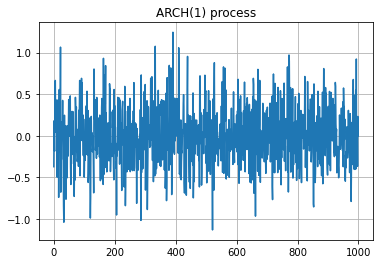

In [ ]:
plt.title('ARCH(1) process')
x = range(n)
plt.plot(x,y)
plt.grid(True)
plt.show();

#### 2. Stima di un modello ARCH

In [ ]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from arch import arch_model
from datetime import date, datetime
import pandas as pd
import pandas_datareader.data as web

In [ ]:
start_date = '2015-01-01'
end_date = '2018-12-31'
#end_date = datetime.today()
titolo = 'GOOG'

In [ ]:
df = web.get_data_yahoo(titolo, start_date, end_date) 

In [ ]:
returns = df['Adj Close'].pct_change().dropna()
returns = df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'

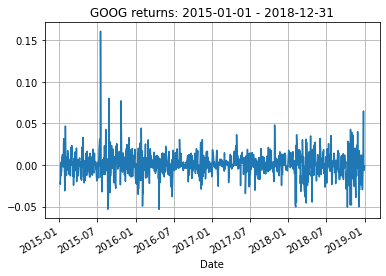

In [ ]:
returns.plot(title=f'{titolo} returns: {start_date} - {end_date}', grid=True);

In [ ]:
model = arch_model(returns, mean = 'Zero', vol='ARCH', p = 1, o = 0, q = 0)

In [ ]:
model_fitted = model.fit(disp='off')

C:\Users\s.bencini\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000228. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
returns = 100 * df['Adj Close'].pct_change().dropna()

In [ ]:
model = arch_model(returns, mean = 'Zero', vol='ARCH', p = 1, o = 0, q = 0)

arch_model fa due cose: prima stima un modello ARIMA e poi con residui stima il modello ARCH

In [ ]:
#come in scikit-learn prima si crea il modello e poi si stima con il metodo "fit"
model_fitted = model.fit(disp='off')

In [ ]:
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1800.28
Distribution:                  Normal   AIC:                           3604.55
Method:            Maximum Likelihood   BIC:                           3614.38
                                        No. Observations:                 1005
Date:                Sun, Dec 12 2021   Df Residuals:                     1005
Time:                        17:10:19   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.6274      0.167      9.739  2.048e-22   [  1.30

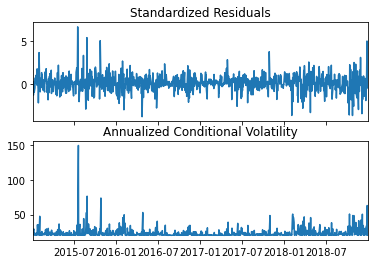

In [ ]:
model_fitted.plot(annualize = 'D');

I residui standardizzati (standardized residuals) sono ottenuti dividendo i residui per la volatilità condizionale
La 'D' indica che vogliamo annualizzare la volatilità condizionale partendo da dati giornalieri

#### Modello GARCH (Generalized AutoRegressive Conditional Heteroskedasticity

$
r_t = \mu + \epsilon_t
$

$
\epsilon_t = \sigma_t z_t
$

$
\sigma^{2}_{t} = \omega + \sum_{i=1}^q a_i \epsilon^{2}_{t-i} + \sum_{i=1}^p \beta_i \sigma^{2}_{t-i}
$

dove
$
\omega > 0,
$
$
\alpha_i >= 0,
$
$
\beta_i >= 0,
$
$
\alpha_i + \beta_i < 1\
$

#### 1. Simulazione di un processo GARCH(1,1)

In [ ]:
sp.random.seed(12345)
n = 1000 
a = (0.1, 0.3) #coefficienti del processo ARCH
alpha = (0.1, 0.3) #coefficienti del processo GARCH
beta = 0.2
errors = sp.random.normal(0,1,n)
t = np.zeros(n)
t[0] = sp.random.normal(0, np.sqrt(a[0] / (1 - a[1])), 1)
for i in range(1,n-1):
    t[i] = errors[i]*np.sqrt(alpha[0] + alpha[1]*errors[i-1]**2 + beta*t[i-1]**2)
    y = t#[n1-1:-1]
    


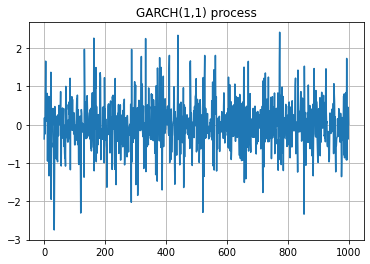

In [ ]:
plt.title('GARCH(1,1) process')
x = range(n)
plt.plot(x,y)
plt.grid(True)
plt.show();

#### 2. Stima di un processo GARCH

In [ ]:
model = arch_model(returns, mean = 'Zero', vol='GARCH', p = 1, o = 0, q = 1)

In [ ]:
model_fitted = model.fit(disp = 'off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1765.35
Distribution:                  Normal   AIC:                           3536.70
Method:            Maximum Likelihood   BIC:                           3551.44
                                        No. Observations:                 1005
Date:                Sun, Dec 12 2021   Df Residuals:                     1005
Time:                        17:10:29   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1801      0.163      1.108      0.268    [ -

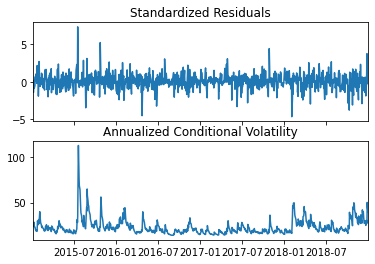

In [ ]:
model_fitted.plot(annualize='D');

Poiché abbiamo inserito nel modello la volatilità passata la volatilità condizionale impiega più tempo a tornare ai livelli medi dopo ogni picco

### Modello Constant Conditional Correlation - GARCH per prevedere la volatilità multivariata
Il modello consiste in N modelli GARCH univariati messi in relazione fra di loro da una matrice di correlazioni condizionali costante R

In [ ]:
titoli = ['GOOG', 'MSFT', 'AAPL']
N = len(titoli)
start_date = '2015-01-01'
end_date = '2018-12-31'


In [ ]:
df = web.get_data_yahoo(titoli, start_date, end_date) 

Symbols,GOOG,MSFT,AAPL
Date,,,
2015-01-05,-2.084561,-0.930250,-2.817173
2015-01-06,-2.317715,-1.457098,0.009413
2015-01-07,-0.171326,1.270559,1.402220
2015-01-08,0.315308,2.941811,3.842230
2015-01-09,-1.295060,-0.840525,0.107274
...,...,...,...
2018-12-24,-0.338935,-4.173901,-2.587417
2018-12-26,6.478047,6.830981,7.042184
2018-12-27,0.425225,0.616552,-0.648985


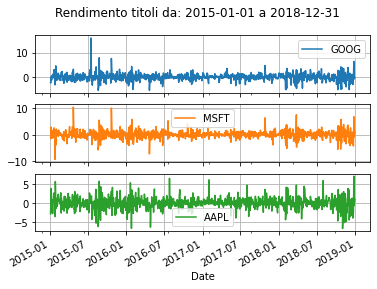

In [ ]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.plot(subplots = True, grid=True, title=f'Rendimento titoli da: {start_date} a {end_date}');
returns

Matrice di varianze covarianze

In [ ]:
returns.cov()

Symbols,GOOG,MSFT,AAPL
Symbols,,,
GOOG,2.282338,1.533053,1.193440
MSFT,1.533053,2.306443,1.324863
AAPL,1.193440,1.324863,2.378116


In [ ]:
returns.corr()

Symbols,GOOG,MSFT,AAPL
Symbols,,,
GOOG,1.000000,0.668184,0.512264
MSFT,0.668184,1.000000,0.565696
AAPL,0.512264,0.565696,1.000000


In [ ]:
coeffs = []
cond_vol = []
std_resids = []
models = []

In [ ]:
for asset in returns.columns:
    model = arch_model(returns[asset], mean = 'Constant', vol='GARCH',
                       p = 1, o = 0, q = 1).fit(update_freq = 0, disp = 'off')
    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility)
    std_resids.append(model.resid / model.conditional_volatility)
    models.append(model)
    

In [ ]:
coeffs_df = pd.DataFrame(coeffs, index=returns.columns)
cond_vol_df = pd.DataFrame(cond_vol).transpose().set_axis(returns.columns,
                                                         axis='columns', inplace = False)
std_resids_df = pd.DataFrame(std_resids).transpose().set_axis(returns.columns,
                                                             axis = 'columns', inplace = False)

In [ ]:
coeffs_df

,mu,omega,alpha[1],beta[1]
Symbols,,,,
GOOG,0.081342,0.195929,0.188276,0.745798
MSFT,0.119548,0.386382,0.251048,0.624897
AAPL,0.120026,0.222060,0.124712,0.784913


In [ ]:
cond_vol_df

Symbols,GOOG,MSFT,AAPL
Date,,,
2015-01-05,1.554849,2.042114,1.980326
2015-01-06,1.697693,1.808048,2.091925
2015-01-07,1.851771,1.747355,1.912716
2015-01-08,1.662929,1.620775,1.816228
2015-01-09,1.506192,2.006886,2.130509
...,...,...,...
2018-12-24,1.956273,2.321035,2.360720
2018-12-26,1.755948,2.894920,2.347455
2018-12-27,3.193638,4.114780,3.243921


In [ ]:
std_resids_df

Symbols,GOOG,MSFT,AAPL
Date,,,
2015-01-05,-1.392999,-0.514092,-1.483189
2015-01-06,-1.413128,-0.872016,-0.052876
2015-01-07,-0.136447,0.658689,0.670361
2015-01-08,0.140695,1.741316,2.049399
2015-01-09,-0.913829,-0.478394,-0.005985
...,...,...,...
2018-12-24,-0.214836,-1.849800,-1.146871
2018-12-26,3.642878,2.318351,2.948779
2018-12-27,0.107678,0.120781,-0.237062


Calcoliamo la matrice di correlazioni costanti condizionali 

In [ ]:
R = std_resids_df.transpose().dot(std_resids_df).div(len(std_resids_df))

In [ ]:
R

Symbols,GOOG,MSFT,AAPL
Symbols,,,
GOOG,1.000316,0.657725,0.498863
MSFT,0.657725,0.999574,0.516548
AAPL,0.498863,0.516548,1.001665


Calcoliamo la previsione della matrice di covarianze condizionale per la prossima osservazione

In [ ]:
#from arch.__future__ import reindexing
diag = []
D = np.zeros((N,N))
for model in models:
    diag.append(model.forecast(horizon=1).variance.values[-1][0])
diag = np.sqrt(np.array(diag))
np.fill_diagonal(D, diag)
H = np.matmul(np.matmul(D, R.values), D)

In [ ]:
H

array([[4.78060896, 3.32316901, 2.61671452],
       [3.32316901, 5.33930374, 2.86448902],
       [2.61671452, 2.86448902, 5.76669054]])